<a href="https://colab.research.google.com/github/RazRabino/object-detection-with-pytorch-and-OneNet-algorithm/blob/main/ex2_onenet_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** install torchvision:


In [12]:
pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


**2.** install the current version of pyyaml and pycocotools.

Check if cuda is available:

In [13]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [14]:
import torch, torchvision
from IPython.display import Image
from IPython.display import display

print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


**3.** Clone & Install from source:

In [15]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 8.49 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [16]:
cd OneNet


/content/OneNet/OneNet


In [ ]:
!python setup.py build develop

**4.** Now, we will pass the section of the training.We will mount to Google drive to get access for a trained model.


**5.** Evaluate:

In [17]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], resume=False)
[05/01 06:43:22 detectron2]: Rank of current process: 0. World size: 1
[05/01 06:43:23 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME               /usr/

**6.** Visualize:

We will run the model on several images to see the results.

[get image as input and make an image for the output.]

In [21]:
!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/test.jpg --output /content/test_res.jpg --confidence-threshold 0.35 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/test2.jpg --output /content/test_res2.jpg --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth


[05/01 06:48:55 detectron2]: Arguments: Namespace(confidence_threshold=0.35, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/test.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/test_res.jpg', video_input=None, webcam=False)
[05/01 06:48:58 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][05/01 06:48:58 detectron2]: /content/test.jpg: detected 5 instances in 0.14s
100% 1/1 [00:00<00:00,  3.94it/s]
[05/01 06:48:59 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/test2.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/test_res2.jpg', video_input=None, webcam=False)
[05/01 06:49:02 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][05/01 06:49:02 detectron2]: /content/t

Original

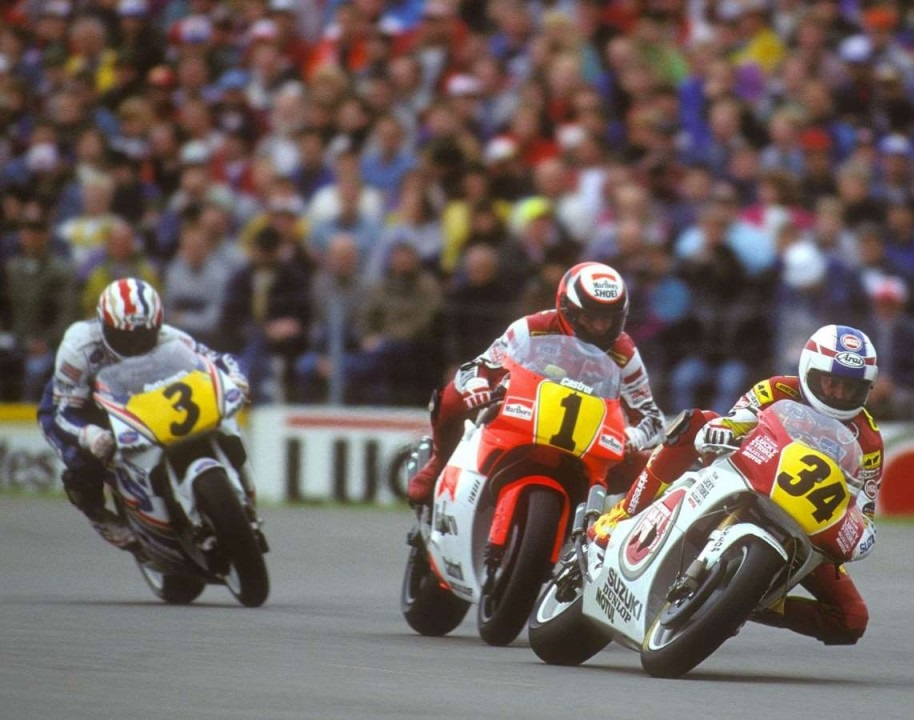

In [19]:
x = Image(filename='/content/test.jpg') 
display(x)

Result

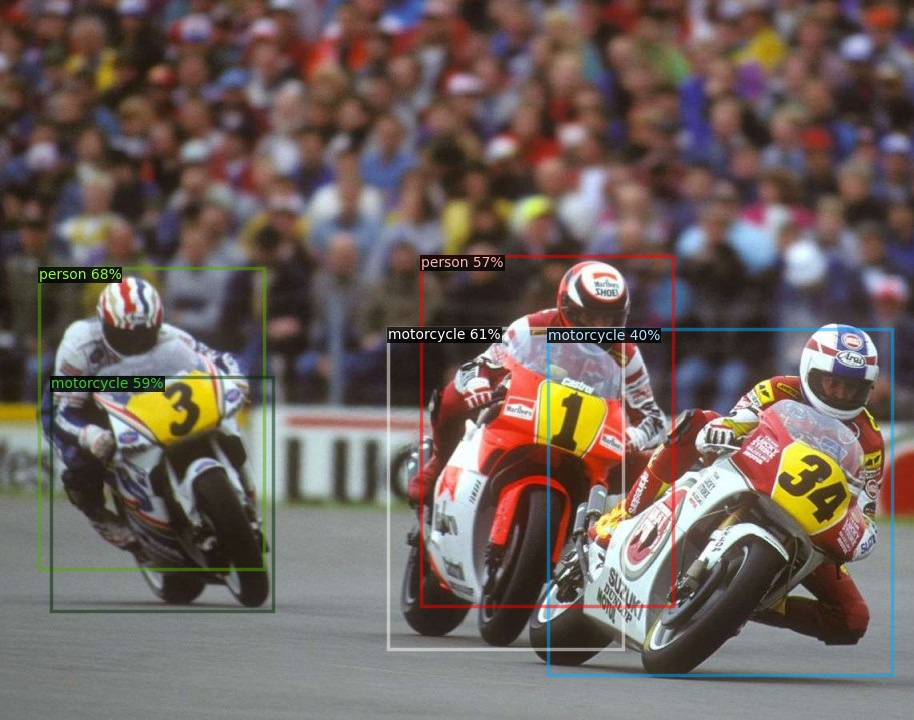

In [22]:
x = Image(filename='/content/test_res.jpg') 
display(x)

Original

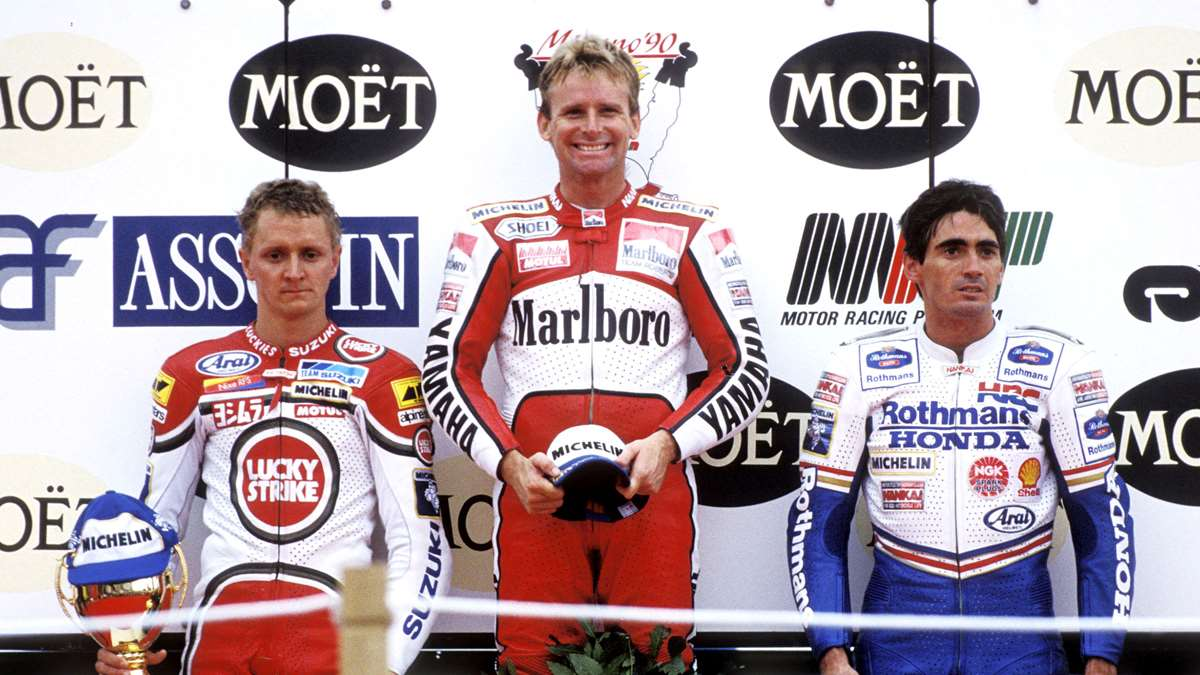

In [20]:
x = Image(filename='/content/test2.jpg') 
display(x)

Result

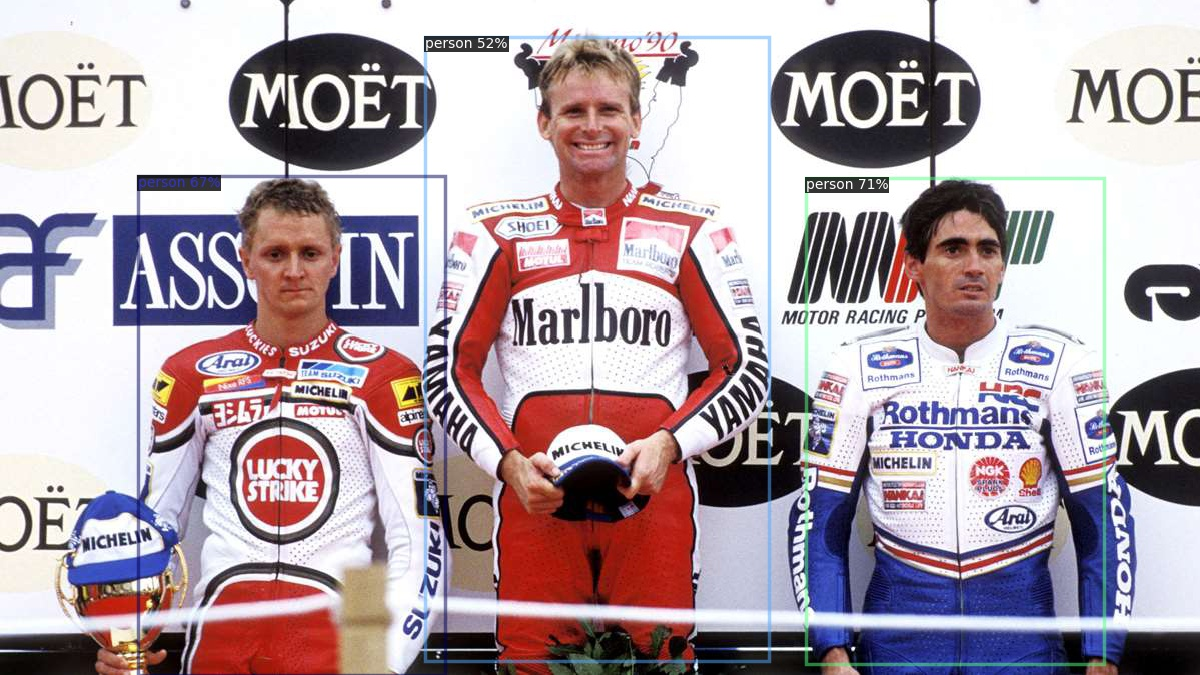

In [23]:
x = Image(filename='/content/test_res2.jpg') 
display(x)